TITANIC SURVIVAL PREDICTION

In [93]:
import pandas as pd
import seaborn as sns
sns,set()
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from sklearn.metrics import *# star means we are importing all the metrices
#ignoring warnings in the code
import warnings
warnings.filterwarnings('ignore')

In [94]:
train_data=pd.read_csv(r"C:\Users\naths\ML\train.csv")

In [95]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
train_data.shape

(891, 12)

In [97]:
train_data.nunique() # all unique value

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [98]:
train_data.columns # all the name of the column

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [99]:
train_data.info() 
#information about dataset each column checking each column in right data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [100]:
#total missing value in the data set
train_data.isna().sum().sum()

866

In [101]:
train_data.isna().sum() # collecting all null values in the dataset isnull=isna

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [102]:
#calculating the pecentage of the null values
(train_data.isnull().sum()/(len(train_data)))*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [103]:
#filling the nan values
train_data.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [104]:
#describing the data set.T means transposing data 
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [105]:
#finfing the detail of maximum age person
train_data[train_data['Age']==80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [106]:
train_data.Survived.sum()# number of survival

342

In [107]:
train_data.Survived.count()# number of pessenger 

891

In [108]:
y=(train_data.Survived.count())-(train_data.Survived.sum())
y #not survived

549

[Text(0.5, 0, 'Survival status'),
 Text(0, 0.5, 'Counts'),
 Text(0.5, 1.0, 'Survival status')]

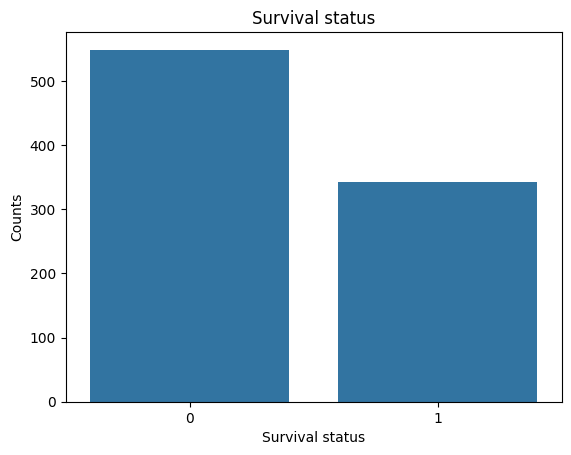

In [109]:
sns.countplot(data=train_data, x='Survived').set(xlabel='Survival status', ylabel='Counts', title='Survival status')

<Axes: xlabel='Survived', ylabel='count'>

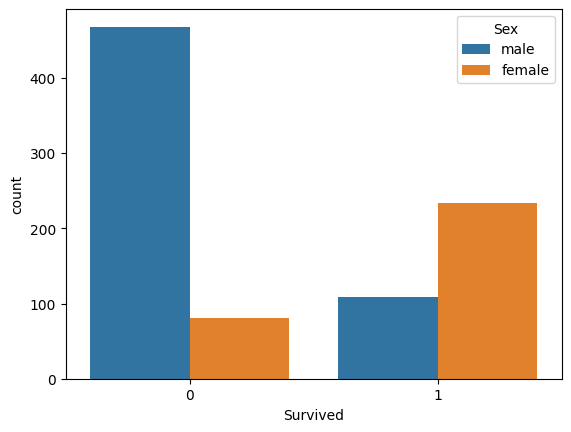

In [110]:
sns.countplot(data=train_data,x='Survived',hue='Sex')

<Axes: xlabel='Pclass', ylabel='Age'>

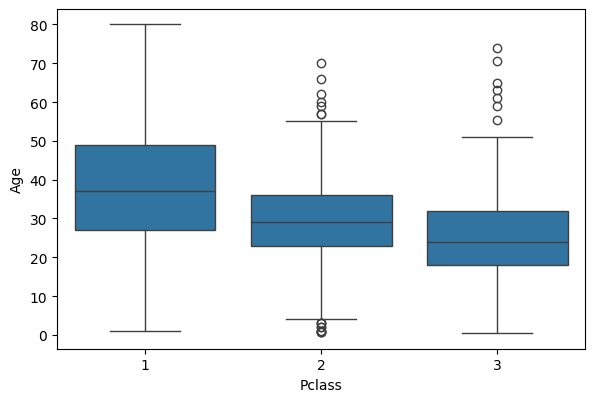

In [111]:
#outliers which is odd in data 
plt.figure(figsize=(15,15))
plt.subplot(3,2,6)
sns.boxplot(x='Pclass',y='Age',data=train_data)

<Axes: xlabel='Survived', ylabel='Density'>

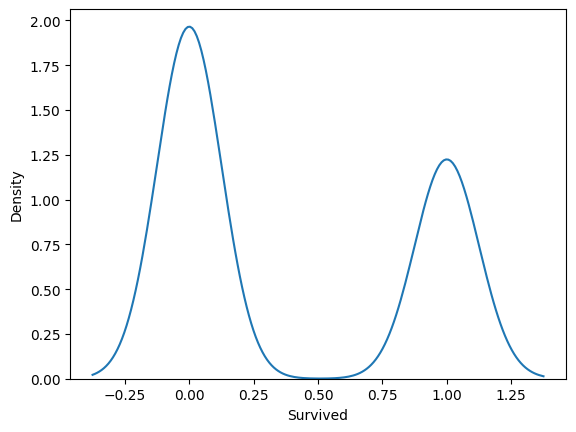

In [112]:
sns.kdeplot(data=train_data,x='Survived')

In [113]:
#percentage of women to survived
women=train_data.loc[train_data.Sex=='female']['Survived']
rate_women=(sum(women)/len(women))*100
rate_women

74.20382165605095

In [114]:
#percentage of men to survived
men=train_data.loc[train_data.Sex=='male']['Survived']
rate_men=(sum(men)/len(men))*100
rate_men

18.890814558058924

In [115]:
#correelation between plcass and survived
from scipy.stats import pearsonr
corr,_=pearsonr(train_data['Pclass'],train_data['Survived'])
corr

-0.33848103596101514

In [116]:
num=train_data.select_dtypes(exclude='object')

<Axes: >

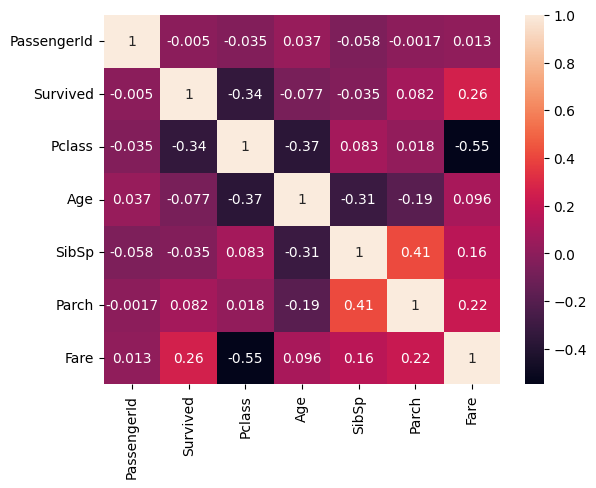

In [117]:
sns.heatmap(num.corr(),annot=True)

In [118]:
train_data.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [119]:
# Replacing null values in Age based on Pclass
def new_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return train_data[train_data['Pclass'] == 1]['Age'].median()
        elif Pclass == 2:
            return train_data[train_data['Pclass'] == 2]['Age'].median()
        elif Pclass == 3:
            return train_data[train_data['Pclass'] == 3]['Age'].median()
    else:
        return Age

In [120]:
# Mapping function to convert categorical variables into numerical
def mapping_data(train_data):
    train_data.Sex = train_data.Sex.map({'female': 0, 'male': 1})
    train_data.Embarked = train_data.Embarked.map({'S': 0, 'C': 1, 'Q': 2})
    return train_data

In [121]:
def preprocessing(train_data, data_type):
    if data_type == 'train':
        train_data['Age'] = train_data[['Age', 'Pclass']].apply(new_age, axis=1)
        train_data = mapping_data(train_data)
        train_data.drop('Cabin', axis=1, inplace=True)
        train_data.dropna(inplace=True)
        train_data.drop(['Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)
        
        # Normalize Age and Fare
        min_age = min(train_data.Age)
        max_age = max(train_data.Age)
        min_fare = min(train_data.Fare)
        max_fare = max(train_data.Fare)
        
        train_data.Age = (train_data.Age - min_age) / (max_age - min_age)
        train_data.Fare = (train_data.Fare - min_fare) / (max_fare - min_fare)
        
        x_data = train_data.drop('Survived', axis=1)
        y_data = train_data['Survived']
        return x_data, y_data
    
    else:
        train_data['Age'] = train_data[['Age', 'Pclass']].apply(new_age, axis=1)
        train_data = mapping_data(train_data)
        train_data.drop('Cabin', axis=1, inplace=True)
        train_data.dropna(inplace=True)
        train_data.drop(['Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)
        
        # Normalize Age and Fare
        min_age = min(train_data.Age)
        max_age = max(train_data.Age)
        min_fare = min(train_data.Fare)
        max_fare = max(train_data.Fare)
        
        train_data.Age = (train_data.Age - min_age) / (max_age - min_age)
        train_data.Fare = (train_data.Fare - min_fare) / (max_fare - min_fare)
        return train_data

In [122]:
# Preprocessing the data
x_data, y_data = preprocessing(train_data, 'train')

In [123]:
x_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.271174,1,0,0.014151,0.0
1,1,0,0.472229,1,0,0.139136,1.0
2,3,0,0.321438,0,0,0.015469,0.0
3,1,0,0.434531,1,0,0.103644,0.0
4,3,1,0.434531,0,0,0.015713,0.0
...,...,...,...,...,...,...,...
886,2,1,0.334004,0,0,0.025374,0.0
887,1,0,0.233476,0,0,0.058556,0.0
888,3,0,0.296306,1,2,0.045771,0.0
889,1,1,0.321438,0,0,0.058556,1.0


In [124]:
y_data

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [125]:
x_data.shape

(889, 7)

In [126]:
x_training_data,x_test_data,y_training_data,y_test_data=train_test_split(x_data,y_data,test_size=0.2,random_state=42,stratify=y_data)

In [128]:
x_training_data.shape

(711, 7)

In [129]:
x_test_data.shape

(178, 7)

In [130]:
# crweating a model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_training_data,y_training_data)
predictions=model.predict(x_test_data)

In [131]:
predictions

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0], dtype=int64)

In [133]:
y_test_data.values #actual values

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0], dtype=int64)

In [137]:
def prediction(test_df_path):
    df=pd.read_csv(test_df_path)
    df=preprocessing(df,'test')
    prediction=model.predict(df)
    df['predicted_survived']=prediction
    return df

In [138]:
test_df=prediction(r"C:\Users\naths\ML\test.csv")

In [139]:
test_df #test data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,predicted_survived
0,3,1,0.452723,0,0,0.015282,2,0
1,3,0,0.617566,1,0,0.013663,0,0
2,2,1,0.815377,0,0,0.018909,2,0
3,3,1,0.353818,0,0,0.016908,0,0
4,3,0,0.287881,1,1,0.023984,0,1
...,...,...,...,...,...,...,...,...
413,3,1,0.001666,0,0,0.015713,0,0
414,1,0,0.512066,0,0,0.212559,1,1
415,3,1,0.505473,0,0,0.014151,0,0
416,3,1,0.001666,0,0,0.015713,0,0


In [145]:
#predicting data
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       110
           1       0.80      0.69      0.74        68

    accuracy                           0.81       178
   macro avg       0.81      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178



In [146]:
print('Accuracy: ', accuracy_score(y_test_data, predictions))

Accuracy:  0.8146067415730337


In [149]:
# predict probabilities
probs=model.predict_proba(x_training_data)[:,1]
probs

array([0.34034805, 0.2303859 , 0.4585054 , 0.92776513, 0.55868269,
       0.11561383, 0.93585778, 0.53717753, 0.43826873, 0.50964074,
       0.74061477, 0.57435277, 0.02096736, 0.29821708, 0.11555442,
       0.29248641, 0.1954255 , 0.10752315, 0.06740156, 0.43850744,
       0.07762138, 0.13002856, 0.91955256, 0.88740845, 0.10758004,
       0.94073495, 0.11018577, 0.06490668, 0.9128218 , 0.76723777,
       0.10758004, 0.10063426, 0.6853146 , 0.14362686, 0.15765385,
       0.88120813, 0.20065582, 0.56897853, 0.36876566, 0.73944858,
       0.2522258 , 0.14109313, 0.58699043, 0.70106095, 0.85930381,
       0.33021535, 0.2806695 , 0.08862594, 0.12114374, 0.15520112,
       0.61741426, 0.29452093, 0.08983208, 0.15462031, 0.4891173 ,
       0.9522231 , 0.13594963, 0.09300912, 0.11557787, 0.24848813,
       0.77206209, 0.12039827, 0.73944858, 0.07749872, 0.2303859 ,
       0.50408107, 0.10752866, 0.08153819, 0.37535754, 0.72056309,
       0.22734669, 0.13786928, 0.06237431, 0.76071314, 0.29250

In [150]:
#calculating ROC curve
fpr,tpr,threshlods=roc_curve(y_test_data, predictions)
fpr,tpr,threshlods

(array([0.        , 0.10909091, 1.        ]),
 array([0.        , 0.69117647, 1.        ]),
 array([inf,  1.,  0.]))

In [151]:
#calculate ADC score
auc_score=roc_auc_score(y_test_data, predictions)
auc_score

0.7910427807486631

In [153]:
#calculating precision-recall curve
precision,recall,thresholds=precision_recall_curve(y_training_data, probs)
precision,recall,thresholds

(array([0.38255977, 0.38418079, 0.38472419, 0.38526912, 0.3858156 ,
        0.38636364, 0.38691323, 0.38746439, 0.38801712, 0.38857143,
        0.38912732, 0.38968481, 0.3902439 , 0.3908046 , 0.39136691,
        0.39193084, 0.39249639, 0.39306358, 0.39363242, 0.3942029 ,
        0.39477504, 0.39534884, 0.39592431, 0.39650146, 0.39708029,
        0.39766082, 0.39677892, 0.3973607 , 0.3979442 , 0.39705882,
        0.39764359, 0.39823009, 0.39881832, 0.39940828, 0.4       ,
        0.40059347, 0.40118871, 0.40178571, 0.4023845 , 0.40298507,
        0.40358744, 0.40419162, 0.4047976 , 0.40540541, 0.40601504,
        0.40573152, 0.40634441, 0.40695915, 0.40757576, 0.40819423,
        0.40881459, 0.40791476, 0.40853659, 0.40916031, 0.40978593,
        0.41041348, 0.41104294, 0.41167435, 0.41230769, 0.41294299,
        0.41358025, 0.41421947, 0.41486068, 0.41550388, 0.41614907,
        0.41679627, 0.41744548, 0.41809672, 0.41875   , 0.41940532,
        0.4200627 , 0.41915228, 0.41981132, 0.42